# Part 1: Build a classification model using text data

#### setting up the libraries and the dataset

In [36]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
import aimodelshare as ai

In [38]:
X_train, X_test, y_train_labels, y_test_labels, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


In [39]:
X_train.head(10)

0       MyBook Disk Drive Handles Lots of Easy Backups
1                       CIT Posts Eighth Loss in a Row
2    Candy Carson Singing The "National Anthem" Is ...
3    Why You Need To Stop What You're Doing And Dat...
4    27 Times Adele Proved She's Actually The Reale...
5    29 Times #BlackGirlMagic Was More Than Just A ...
6    Scientology ties at New Village Leadership Aca...
7               Judge Allows Asbestos Case to Continue
8              Cities Deal With a Surge in Shantytowns
9                15 Reasons December Is The Best Month
Name: headline, dtype: object

In [40]:
y_train_labels.head(10)

13620    not clickbait
15394    not clickbait
2796         clickbait
1673         clickbait
13020        clickbait
8961         clickbait
3152     not clickbait
6631     not clickbait
3892     not clickbait
14778        clickbait
Name: label, dtype: object

In [41]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

### Use cross-validation to evaluate the results. Use a robust metric for classification  (AUC or F1-Score for example), and inspect all models by visualizing the coefficients. (See helper function in our in class notebook for text models.)

### Import the text data, vectorize the clickbait headline column into an X matrix.  Then run logistic regression at least three times and select a single best model.  Note that you should create three logistic regression models with different different tokenization approaches.  You should not change your modeling approach, you should simply experiment with different tokenizers. Be sure to explain your choices and evaluate your models using cross validation and using test set data.

#### CounterVectorizer (ngram_range=(1,1)

In [55]:
cv= CountVectorizer(ngram_range=(1,1), stop_words = 'english')
##fit the training data on the model
vectors = cv.fit(X_train)
logreg = LogisticRegression()

#transfrom training data into sparse matrix
X_train_vec = cv.transform(X_train)

 
#cross val score 
vec_score =cross_val_score(logreg, X_train_vec, y_train_labels, cv = 5, scoring='f1')

X_train_vec

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

<24979x20066 sparse matrix of type '<class 'numpy.int64'>'
	with 147172 stored elements in Compressed Sparse Row format>

In [56]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train_vec, y_train_labels)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best cross-validation score: 0.95
Best parameters:
{'C': 10}


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


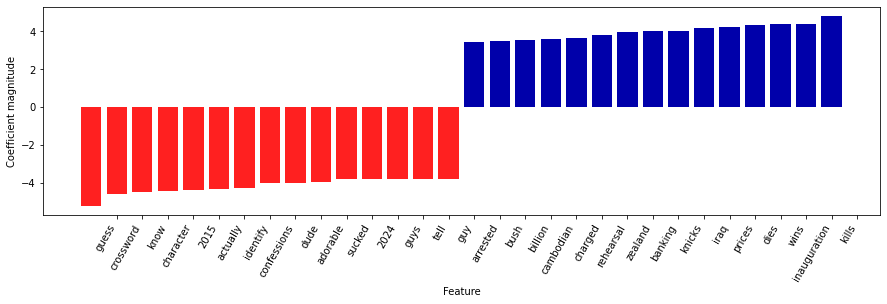

In [57]:
coefs = LogisticRegression(C=10).fit(X_train_vec,y_train_labels).coef_
feature_names = cv.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=15)

My first model had a CounterVectorizer tokenization with (1,1) ngram_range. After running the GridSearchCV on the LogisticRegression model, 10 was suggested as the parameter for C. Wiht this parameter, my model accuracy was 0.95. Then I vizualised the top 15 words with negative and positive coeggicient magnitude. According the diagram, words like kills, inauguration, wins are worlds that you can find in the clickbait headlines. Words like guess, crossword, know are not words that are associated with clickbait headlines.

#### TfidVectorizer(ngram_range=(2,3)

In [58]:
tfid2 = TfidfVectorizer(ngram_range=(2,3) ,min_df=3, norm=None)
##fit the training data on the model
vectors = tfid2.fit(X_train)
logreg = LogisticRegression()

#transfrom training data into sparse matrix
X_train_vec = tfid2.transform(X_train)

 
#cross val score 
vec_score =cross_val_score(logreg, X_train_vec, y_train_labels, cv = 5, scoring = 'f1')

X_train_vec





/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

<24979x13674 sparse matrix of type '<class 'numpy.float64'>'
	with 107118 stored elements in Compressed Sparse Row format>

In [59]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train_vec, y_train_labels)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best cross-validation score: 0.93
Best parameters:
{'C': 0.1}


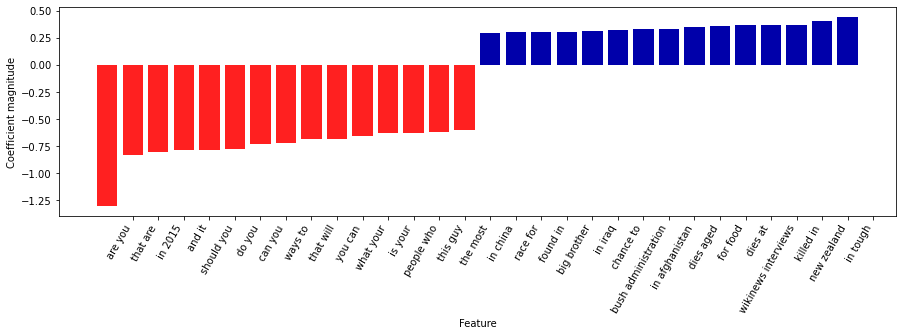

In [60]:

coefs = LogisticRegression(C=0.1).fit(X_train_vec,y_train_labels).coef_
feature_names = tfid2.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=15)

In the second model, I choose TfidVectrizer (ngram_range=(2,3)). After running GridSearchCv on the LogisticRegression, the model suggested C=0.1 as the parameter. The accuracy level of this model was 0.93, so slightly worse than the first model. So word pairs like in though, New-Zealand, killed in are expressions that are assoccited with clickbait headlines, and expression like are you, that are, in 2015 are not. 

#### TfidVectorizer

In [61]:

tfid = TfidfVectorizer(ngram_range=(1,3) ,min_df=5, norm=None)
#fit the train data on the model
vector = tfid.fit(X_train)
#transform
X = tfid.transform(X_train)

X_train_vec = tfid.transform(X_train)


vec_score =cross_val_score(logreg, X_train_vec, y_train_labels, cv = 5,  scoring ='f1')



/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train_vec, y_train_labels)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best cross-validation score: 0.97
Best parameters:
{'C': 0.1}


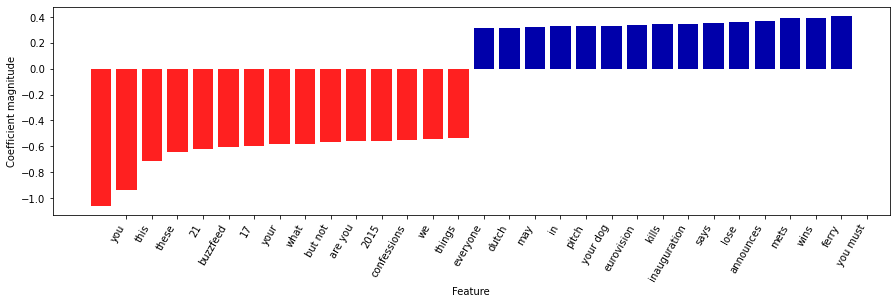

In [63]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=0.1).fit(X_train_vec,y_train_labels).coef_
feature_names = tfid.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=15)

The last model has the best cross-validation score: 0.97. In this model I used TfidfVectorizer again, but with different parameters (ngram = (1,3)). GridSearch CV suggested C=0.1 for the LogisitcRegression. After vizualizing the model, we can see the worlds like you, this, these are negatively assoccited with clickbait headlines, but words like you must, ferry, wins have positive coefficient magnitudes. 

Since this model has the highest cross-validation score 0.97 I would choose this as the final model to evalute my dataset. 

## Part 2: Build a predictive neural network using Keras

#### Setting up the libraries and data 

In [17]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv", delimiter=",")
df.head(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [20]:
df = df.iloc[:,1:]
y = df['Species']
X = df.loc[:, df.columns != 'Species']

display(pd.get_dummies(y))
display(df.head())
display(X.head())
display(y[0::10])

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0          setosa
10         setosa
20         setosa
30         setosa
40         setosa
50     versicolor
60     versicolor
70     versicolor
80     versicolor
90     versicolor
100     virginica
110     virginica
120     virginica
130     virginica
140     virginica
Name: Species, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


### Run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.
### Include code for selecting the number of hidden units using GridSearchCV and evaluation on a test-set.  Describe the differences in the predictive accuracy of models with different numbers of hidden units.  Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.

In [28]:
def create_model(hiddennodes=1):
	# create model
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) # epochs arg is built in to Scikit learn's... 
                                                                      # KerasClassifier

# Building a simple search grid that adjusts epochs
param_grid = dict(hiddennodes=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.742857 using {'hiddennodes': 10}


In [29]:
def create_model(hiddennodes=1):
	# create model
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) # epochs arg is built in to Scikit learn's... 
                                                                      # KerasClassifier

# Building a simple search grid that adjusts epochs
param_grid = dict(hiddennodes=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.642857 using {'hiddennodes': 20}


 I have first train-split the dataset. In both of my models I wanted to predict the hidden units for the first hidden layer with GridSearch CV. In my first model, the number od hidden units of the second layer was 10, in the second model it was 8. After setting up the model, and the compile, GridSearch Cv preditcted a 10 hiddennodes for the first model and 20 for the second model. With these hidden nodes, my first model prediction accuracy is 0.743 and my second's is 0.643. From this results I can say that the first model's accuracy is signifcantly better than the second model's, there for I would choose the first model to evalute the dataset.